## Читаю и рисую траекторию

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os
from collections import namedtuple


Icms_path = os.path.abspath("data\\traj.dat")
file = open(Icms_path)

header = file.readline().split()
lines = file.readlines()

table = [line.split() for line in lines]
table = list(filter(None, table))

R = [float(row[0]) for row in table]
Z = [float(row[1]) for row in table]
#N_traj = [int(row[12]) for row in table]

colors = plt.cm.viridis(np.sin(np.linspace(0, 1, 1100)))
rays = []
N_traj = 0
TRay = namedtuple('Ray' , 'R Z N_traj Color')
for row in table:
    if N_traj != int(row[12]):
         N_traj = int(row[12])
         ray = TRay ([], [], N_traj, colors[N_traj])
         rays.append(ray)
    ray.R.append(float(row[0]))
    ray.Z.append(float(row[1]))


print("Number of traj "+ str(len(rays)))
print("Max N_traj "+ str(N_traj))

Number of traj 982
Max N_traj 1070


['R(m)', 'Z(m)']


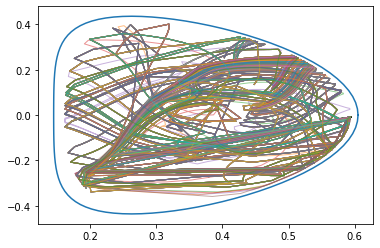

<Figure size 72x72 with 0 Axes>

In [6]:
import bounds
R, Z = bounds.read_bounds()
plt.plot(R, Z)

for ray in rays :
    plt.plot(ray.R, ray.Z, alpha=0.5, linewidth=1);
    #plt.plot(ray.R, ray.Z, c = ray.Color, alpha=0.5, linewidth=1);
plt.figure(figsize=(1,1))
plt.show()

In [4]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

import bounds
R, Z = bounds.read_bounds()


def plot_func(index, k):
    plt.plot(R, Z)
    for i in range(k):
        ray = rays[index + i]
        plt.plot(ray.R, ray.Z, alpha=1.0, linewidth=1)
    plt.xlim(0.12, 0.62)
    plt.ylim(-0.5, 0.5)
    plt.figure(figsize=(1,1))
    plt.show()
 
w = interactive(plot_func, index = (1, 1000), k = (1,100))
w

['R(m)', 'Z(m)']


interactive(children=(IntSlider(value=500, description='index', max=1000, min=1), IntSlider(value=50, descript…